In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
%matplotlib inline

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

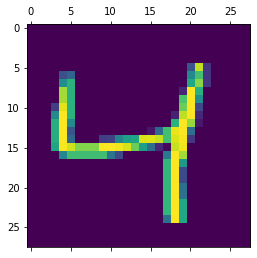

In [10]:
plt.matshow(X_train[2])
plt.show()

In [15]:
#scaling the values
X_train = X_train / 255
X_test = X_test / 255

In [14]:
#Reshaping the input to 1d array from 2d array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4664 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9253


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9254


[0.26612889766693115, 0.9254000186920166]

In [19]:
pred=model.predict(X_test_flattened)

In [20]:
pred.shape

(10000, 10)

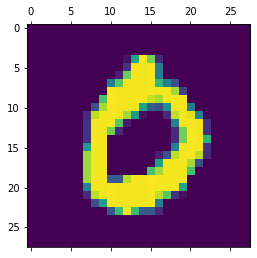

In [23]:
plt.matshow(X_test[3])
plt.show()

In [24]:
np.argmax(pred[3])

0

In [25]:
y_pred_labels = [np.argmax(i) for i in pred]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    4,    6,    3,    4,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,   10,  913,   19,   10,    2,   10,   11,   48,    4],
       [   1,    0,   15,  931,    0,   19,    2,   11,   23,    8],
       [   1,    1,    4,    1,  920,    0,   10,    3,   10,   32],
       [   7,    3,    3,   40,   11,  761,   12,    8,   40,    7],
       [  11,    3,    9,    1,    8,   14,  907,    2,    3,    0],
       [   1,    6,   19,    9,    8,    0,    0,  950,    3,   32],
       [   5,   10,    5,   20,    9,   20,    8,   11,  880,    6],
       [  10,    7,    1,   10,   28,    5,    0,   23,    9,  916]])>

Text(69.0, 0.5, 'Truth')

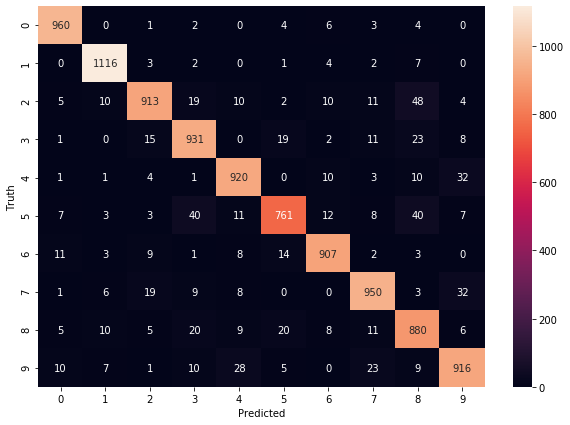

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now trying differnt parameters for model building

In [28]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2007 - accuracy: 0.9400
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0809 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0283 - accuracy: 0.9910


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9816


[0.06774451583623886, 0.9815999865531921]

* Accuracy is now increased

In [32]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1914 - accuracy: 0.9419
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0789 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0549 - accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0320 - accuracy: 0.9891


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9793


[0.07310017198324203, 0.9793000221252441]

* Not as accurate is previous model

In [35]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5486 - accuracy: 0.8614
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.9251
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2150 - accuracy: 0.9388
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1817 - accuracy: 0.9488
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1571 - accuracy: 0.9554
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1386 - accuracy: 0.9607
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1238 - accuracy: 0.9650
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1111 - accuracy: 0.9689
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1006 - accuracy: 0.9714
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.09

In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9690


[0.10083974897861481, 0.968999981880188]

In [38]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6041 - accuracy: 0.8530
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3220 - accuracy: 0.9107
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2420 - accuracy: 0.9324
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2184 - accuracy: 0.9392
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1998 - accuracy: 0.9445
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1839 - accuracy: 0.9493
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1708 - accuracy: 0.9527
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1593 - accuracy: 0.9556
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.149

In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1486 - accuracy: 0.9577


[0.14863526821136475, 0.9577000141143799]

In [40]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='kullback_leibler_divergence',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0118 - accuracy: 0.1044
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 1.4258e-06 - accuracy: 0.0998
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: -9.1218e-07 - accuracy: 0.0992
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: -1.3774e-06 - accuracy: 0.0989
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: -1.5152e-06 - accuracy: 0.0989


In [42]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: -1.5030e-06 - accuracy: 0.0983


[-1.5030288977868622e-06, 0.09830000251531601]

In [43]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2015 - accuracy: 0.9402
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0797 - accuracy: 0.9754
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0510 - accuracy: 0.9837 0s - loss: 0.0511 - ac
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0117 - accuracy: 0.9960
Epoch 10/20
1875/1875 [===========================

In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1038 - accuracy: 0.9816


[0.10379859805107117, 0.9815999865531921]

* This is then most accurate model till now

In [45]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1995 - accuracy: 0.9411
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0787 - accuracy: 0.9759
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 9/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step - l

In [46]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1400 - accuracy: 0.9818


[0.14000080525875092, 0.9818000197410583]